# Задание 1

In [ ]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/image.jpg')

img_r = (img / 255.0).reshape(-1,3)
print("Img's shape: ", img_r.shape)


Img's shape:  (455975, 3)


In [ ]:
count = [2, 3, 4, 8, 16, 32, 64, 128, 256]
for i in count:
  k_colors = KMeans(n_clusters=4).fit(img_r)
  
  imgC = k_colors.cluster_centers_[k_colors.labels_]
  imgC = (np.reshape(imgC, (img.shape))*255).astype(np.uint8) 
  plt.figure(figsize=(11,6))
  plt.subplot(121), plt.imshow(img),plt.title('Original image')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(imgC),plt.title(f'Compressed image, count color {i}')
  plt.xticks([]), plt.yticks([])
  plt.show()
  cv2.imwrite(f'./content/drive/MyDrive/work3/Scikit_Compressor/output_count_color_{i}.jpg', imgC)

# Задание 2


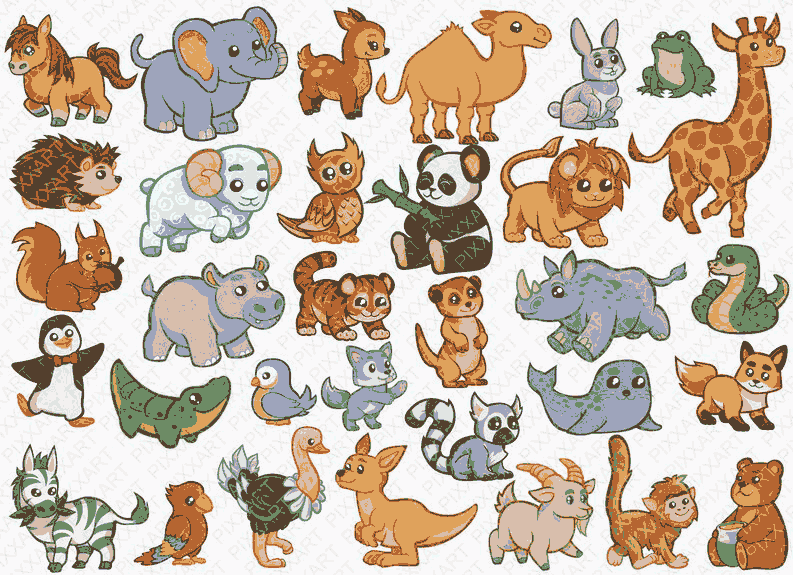

In [ ]:
import numpy as np
import matplotlib
from PIL import Image

def kmeans(Input,K,Max_iters):
    
    N,D = np.shape(Input)
    R = np.random.permutation(N)
    Kvec = Input[R[0:K],:]
    Distance = np.zeros((N,K))
    
    for nn in range(0,Max_iters):
        F = np.zeros((N,K))
        for kk in range(0,K):
            Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:], (N,1)),dtype=np.float64),axis=1 )
        Dmin = Distance.argmin(axis=1) % Distance.shape[1]
        for mm in range(0,K):
            if np.size(Dmin[mm==Dmin]) >0:
                Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
        for ii in range(0,N):
            F[ii,Dmin[ii]] = 1
        error = sum(sum((F*Distance)/N))
        #print('Error = ' + str(error))
    return Kvec,Dmin


Datain = np.asarray(Image.open('/content/image.jpg'),dtype=np.float64)

ReshapedData = np.reshape(Datain, (np.size(Datain,0) * np.size(Datain,1),np.size(Datain,2)))

K = 10 # устанавливаем количество цветов
Max_iters = 15 # устанавливаем количество итераций, чем больше итераций, тем тщательнее будет осуществляться кластеризация и тем дольше будет работать программа

Kvec,Dmin = kmeans(ReshapedData,K,Max_iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,K):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

im = Image.fromarray(imout,'RGB')
im.show()
im.save('/content/drive/MyDrive/work3/Scikit_Compressor/output.jpeg')


In [ ]:
K_list = [2, 3, 4, 8, 16, 32, 64, 128, 256]
for K in K_list:
  Kvec,Dmin = kmeans(ReshapedData,K,15)

  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), 
  (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  im.show()
  im.save('/content/drive/MyDrive/work3/K-means Compressor/output{K}.jpeg')

# Задание 3

In [ ]:
import os
import time
img = cv2.imread('/content/image.jpg') # Вводим исходное изображение

#print("Img's shape: ", img.shape)

img_r = (img / 255.0).reshape(-1,3) # Нормализуем изображение

#print("New shape (img_r): ", img_r.shape) # Выводим параметры нормализованного изображения
print('Scikit Compressor')
count = [2, 3, 4, 8, 16, 32, 64, 128, 256]
for i in count:
  print(f'count color {i}')
  start_time = time.time()
  k_colors = KMeans(n_clusters=i).fit(img_r)
  print("--- %s seconds ---" % (time.time() - start_time))
  # Устанавливаем необходимое количество цветов 
  # и запускаем процесс обучения (кластеризации пикселей по 
  # группам)
  imgC = k_colors.cluster_centers_[k_colors.labels_]
  imgC = (np.reshape(imgC, (img.shape))*255).astype(np.uint8) 
  # Возвращаем изображению исходные параметры
  #print("Compressed image's shape: ", imgC.shape)
  file_name = '/content/drive/MyDrive/work3/test/output{i}.jpg'
  cv2.imwrite(file_name, imgC)
  print(os.path.getsize(file_name))
  os.remove(file_name)
  print('---------------------------')

Scikit Compressor
count color 2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 2.40254807472229 seconds ---
203049
---------------------------
count color 3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 2.5395498275756836 seconds ---
225671
---------------------------
count color 4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 1.7362210750579834 seconds ---
234530
---------------------------
count color 8


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 3.660999298095703 seconds ---
242664
---------------------------
count color 16


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 7.375715494155884 seconds ---
275388
---------------------------
count color 32


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 15.307897806167603 seconds ---
264564
---------------------------
count color 64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 36.983471155166626 seconds ---
259901
---------------------------
count color 128


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 83.78223752975464 seconds ---
254290
---------------------------
count color 256


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 184.51607036590576 seconds ---
252601
---------------------------


In [ ]:
K_list = [2, 3, 4, 8, 16, 32, 64, 128, 256]
print('K-means Compressor')
for K in K_list:
  print(f'count color {K}')
  start_time = time.time()
  Kvec,Dmin = kmeans(ReshapedData,K,20)
  print("--- %s seconds ---" % (time.time() - start_time))
  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), 
  (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  file_name = '/content/drive/MyDrive/work3/test{K}.jpeg'
  im.save(file_name)
  print(os.path.getsize(file_name))
  os.remove(file_name)

K-means Compressor
count color 2
--- 8.65926480293274 seconds ---
95905
count color 3
--- 9.478663921356201 seconds ---
108605
count color 4
--- 8.849581718444824 seconds ---
108325
count color 8
--- 10.748400449752808 seconds ---
120985
count color 16
--- 13.534156799316406 seconds ---
120076
count color 32
--- 21.174903392791748 seconds ---
119853
count color 64
--- 38.76607608795166 seconds ---
119917
count color 128
--- 61.840479373931885 seconds ---
118023
count color 256
--- 124.42501854896545 seconds ---
116104


# Задание 4


In [ ]:
from os import listdir
from os.path import isfile, join
import numpy as np
from PIL import Image
onlyfiles = [f for f in listdir(f'./input_image/') if isfile(join(f'./input_image/', f))]

path = '/content/drive/MyDrive/work3/input_image'

data = []

for image in onlyfiles:
    Datain = np.asarray(Image.open(path + '/work3/input_image/' + image),dtype=np.float64)
    data.append(np.reshape(Datain, (np.size(Datain,0) * np.size(Datain,1),np.size(Datain,2))))

In [ ]:
from tqdm import tqdm
def kmeans(Input,K,Max_iters):
    
    N,D = np.shape(Input)
    R = np.random.permutation(N)
    Kvec = Input[R[0:K],:]
    Distance = np.zeros((N,K))
    
    for nn in range(0,Max_iters):
        F = np.zeros((N,K))
        for kk in range(0,K):
            Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:], 
                                     (N,1)),dtype=np.float64),axis=1 )
        Dmin = Distance.argmin(axis=1) % Distance.shape[1]
        for mm in range(0,K):
            if np.size(Dmin[mm==Dmin]) >0:
                Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
        for ii in range(0,N):
            F[ii,Dmin[ii]] = 1
        error = sum(sum((F*Distance)/N))

    return Kvec,Dmin

for i in range(len(data)):

  Kvec,Dmin = kmeans(data[i],400,60)

  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), 
  (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  im.save('/content/drive/MyDrive/work3/result5image{i}.jpeg')

При K = 400 и Max_iter = 60 сжатие происходит без наглядного ухудшения качества изображения.